In [4]:
from importlib import reload
import time
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
from matgen import base, matutils

In [19]:
def get_p(a):
    return round((a < 15).sum() / len(a), 3), round((a >= 15).sum() / len(a), 3)

# Cu_01Cr_01Zr

### Random

pass1
[0.022 0.02  0.019 0.021 0.018 0.02  0.019 0.019]
0.02


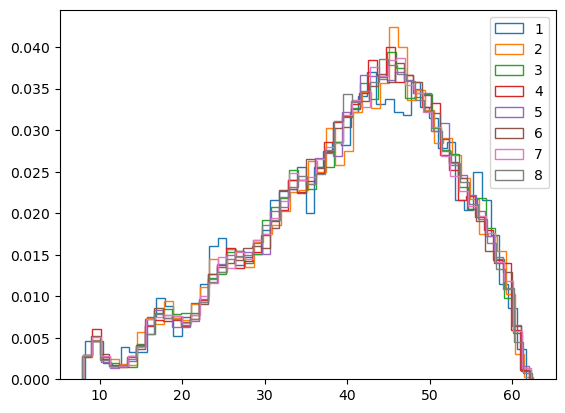

In [118]:
# pass1
print('pass1')
rand_dirname = 'Experimental_Data/ECAP2022/Cu_01Cr_01Zr/Neper_RandomOri_Cu-0.1Cr-0.1Zr/pass1/disangles'

rand_disangles = {}
for i in range(1, 9):
    filename = os.path.join(rand_dirname, f'disangles{i}.txt')
    rand_disangles[i] = np.loadtxt(filename)
    
for i in range(1, 9):
    plt.hist(rand_disangles[i], bins=50, density=True, histtype='step', label=str(i))
plt.legend()
# plt.show()
fname = os.path.join(rand_dirname, f'disangles.png')
plt.savefig(fname, dpi=300)
    
arr = np.array([get_p(d)[0] for d in rand_disangles.values()])
print(arr)
print(arr.mean().round(3))

arr1 = arr

pass4
[0.023 0.024 0.022 0.023 0.022 0.023 0.022 0.023]
0.023


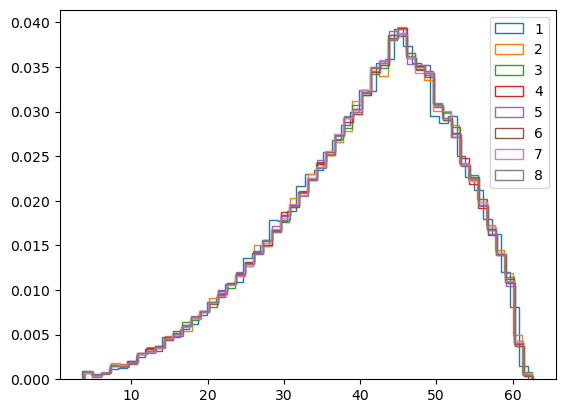

In [119]:
# pass4
print('pass4')
rand_dirname = 'Experimental_Data/ECAP2022/Cu_01Cr_01Zr/Neper_RandomOri_Cu-0.1Cr-0.1Zr/pass4/disangles'

rand_disangles = {}
for i in range(1, 9):
    filename = os.path.join(rand_dirname, f'disangles{i}.txt')
    rand_disangles[i] = np.loadtxt(filename)

for i in range(1, 9):
    plt.hist(rand_disangles[i], bins=50, density=True, histtype='step', label=str(i))
plt.legend()
# plt.show()
fname = os.path.join(rand_dirname, f'disangles.png')
plt.savefig(fname, dpi=300)
    
arr = np.array([get_p(d)[0] for d in rand_disangles.values()])
print(arr)
print(arr.mean().round(3))

arr4 = arr

pass8
[0.024 0.022 0.021 0.022 0.021 0.022 0.022 0.021]
0.022


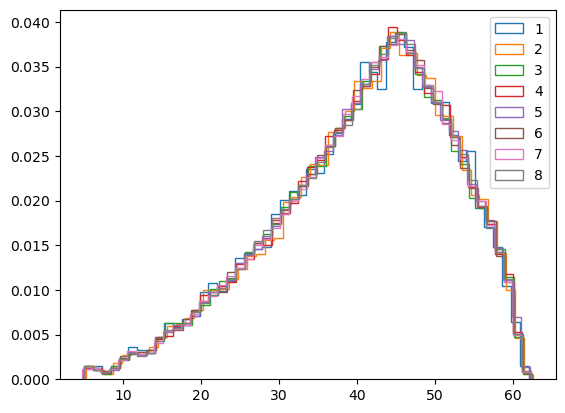

In [120]:
# pass8
print('pass8')
rand_dirname = 'Experimental_Data/ECAP2022/Cu_01Cr_01Zr/Neper_RandomOri_Cu-0.1Cr-0.1Zr/pass8/disangles'

rand_disangles = {}
for i in range(1, 9):
    filename = os.path.join(rand_dirname, f'disangles{i}.txt')
    rand_disangles[i] = np.loadtxt(filename)
    
for i in range(1, 9):
    plt.hist(rand_disangles[i], bins=50, density=True, histtype='step', label=str(i))
plt.legend()
# plt.show()
fname = os.path.join(rand_dirname, f'disangles.png')
plt.savefig(fname, dpi=300)
    
arr = np.array([get_p(d)[0] for d in rand_disangles.values()])
print(arr)
print(arr.mean().round(3))

arr8 = arr

In [114]:
q_rand = round((0.022 + 0.023 + 0.02) / 3, 4)
p_rand = 1 - q_rand

In [122]:
Q = (q_rand, p_rand)
print(Q)

(0.0217, 0.9783)


### pass1

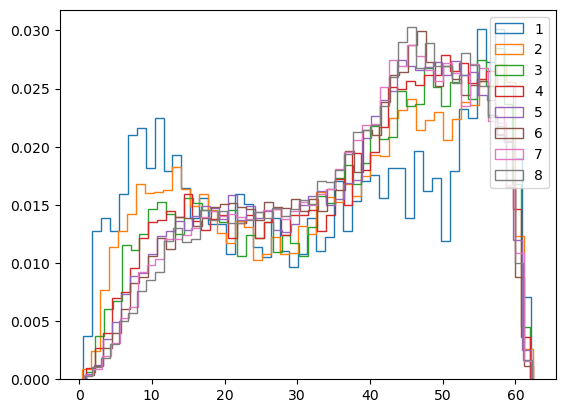

In [158]:
dirname = 'Experimental_Data/ECAP2022/Cu_01Cr_01Zr/Neper_Cu_01Cr_01Zr/pass1/disangles'

disangles = {}
for i in range(1, 9):
    filename = os.path.join(dirname, f'disangles{i}.txt')
    disangles[i] = np.loadtxt(filename)

for i in range(1, 9):
    plt.hist(disangles[i], bins=50, density=True, histtype='step', label=str(i))
plt.legend()
# plt.show()
fname = os.path.join(dirname, f'disangles.png')
plt.savefig(fname, dpi=300)

disangles1 = disangles

In [159]:
distance = []
x = []
for i in range(1, 9):
    P = get_p(disangles[i])
    d = matutils._hellinger(P, Q)
    x.append(i)
    distance.append(d)
    print(i, P, round(d,3))
    
distance1 = distance

1 (0.235, 0.765) 0.252
2 (0.18, 0.82) 0.205
3 (0.143, 0.857) 0.169
4 (0.132, 0.868) 0.158
5 (0.112, 0.888) 0.137
6 (0.107, 0.893) 0.131
7 (0.098, 0.902) 0.12
8 (0.092, 0.908) 0.113


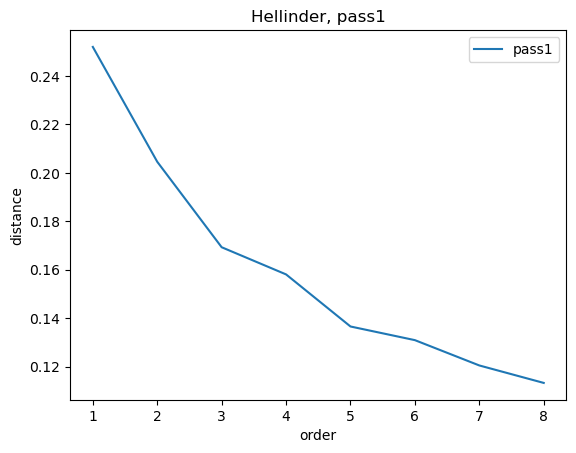

In [160]:
plt.plot(x, distance, label='pass1')
plt.title('Hellinder, pass1')
plt.xlabel('order')
plt.ylabel('distance')
plt.legend()
plt.show()

In [161]:
ps = np.array([get_p(disangles[i])[1] for i in range(1,9)])
qs = 1 - ps

qs1 = qs

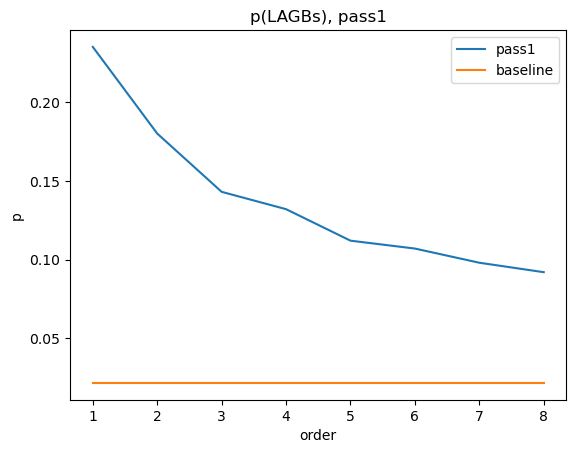

In [162]:
plt.plot(x, qs, label='pass1')
plt.plot(x, [Q[0]]*len(x), label='baseline')
plt.title('p(LAGBs), pass1')
plt.xlabel('order')
plt.ylabel('p')
plt.legend()
plt.show()

### Pass 4

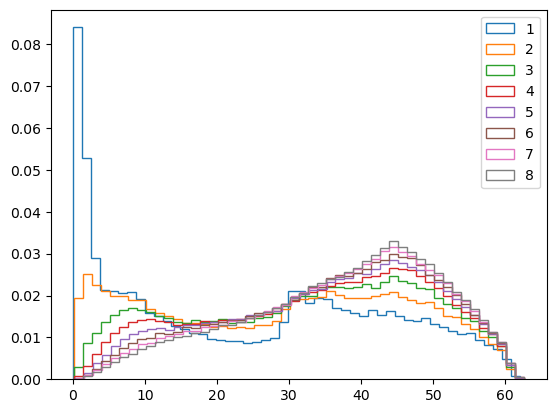

In [163]:
dirname = 'Experimental_Data/ECAP2022/Cu_01Cr_01Zr/Neper_Cu_01Cr_01Zr/pass4/disangles'

disangles = {}
for i in range(1, 9):
    filename = os.path.join(dirname, f'disangles{i}.txt')
    disangles[i] = np.loadtxt(filename)

for i in range(1, 9):
    plt.hist(disangles[i], bins=50, density=True, histtype='step', label=str(i))
plt.legend()
# plt.show()
fname = os.path.join(dirname, f'disangles.png')
plt.savefig(fname, dpi=300)

disangles4 = disangles

In [164]:
distance = []
x = []
for i in range(1, 9):
    P = get_p(disangles[i])
    d = matutils._hellinger(P, Q)
    x.append(i)
    distance.append(d)
    print(i, P, round(d,3))
    
distance4 = distance

1 (0.406, 0.594) 0.379
2 (0.283, 0.717) 0.29
3 (0.2, 0.8) 0.222
4 (0.155, 0.845) 0.181
5 (0.122, 0.878) 0.147
6 (0.102, 0.898) 0.125
7 (0.089, 0.911) 0.11
8 (0.079, 0.921) 0.097


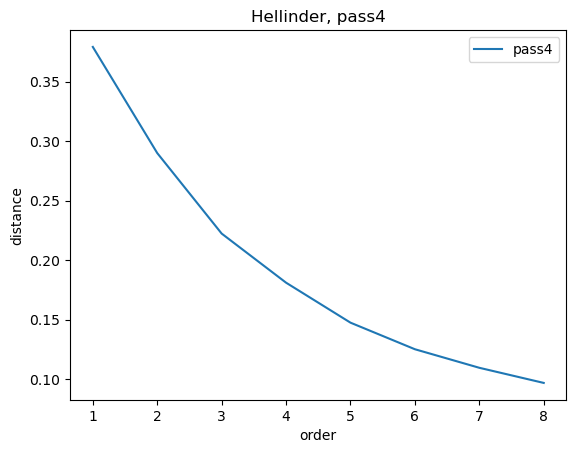

In [165]:
plt.plot(x, distance, label='pass4')
plt.title('Hellinder, pass4')
plt.xlabel('order')
plt.ylabel('distance')
plt.legend()
plt.show()

In [166]:
ps = np.array([get_p(disangles[i])[1] for i in range(1,9)])
qs = 1 - ps

qs4 = qs

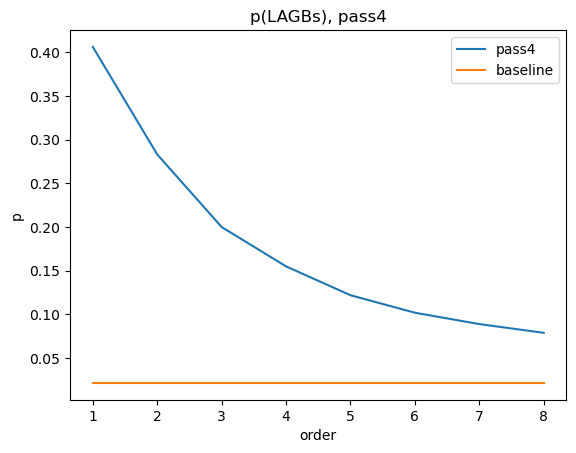

In [167]:
plt.plot(x, qs, label='pass4')
plt.plot(x, [Q[0]]*len(x), label='baseline')
plt.title('p(LAGBs), pass4')
plt.xlabel('order')
plt.ylabel('p')
plt.legend()
plt.show()

### Pass 8

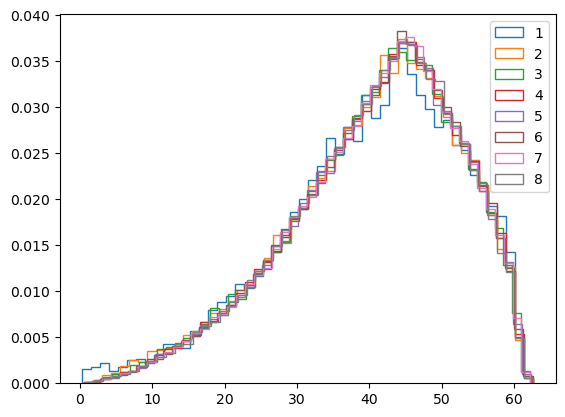

In [168]:
dirname = 'Experimental_Data/ECAP2022/Cu_01Cr_01Zr/Neper_Cu_01Cr_01Zr/pass8/disangles'

disangles = {}
for i in range(1, 9):
    filename = os.path.join(dirname, f'disangles{i}.txt')
    disangles[i] = np.loadtxt(filename)

for i in range(1, 9):
    plt.hist(disangles[i], bins=50, density=True, histtype='step', label=str(i))
plt.legend()
# plt.show()
fname = os.path.join(dirname, f'disangles.png')
plt.savefig(fname, dpi=300)

disangles8 = disangles

In [169]:
distance = []
x = []
for i in range(1, 9):
    P = get_p(disangles[i])
    d = matutils._hellinger(P, Q)
    x.append(i)
    distance.append(d)
    print(i, P, round(d,3))
    
distance8 = distance

1 (0.038, 0.962) 0.034
2 (0.034, 0.966) 0.027
3 (0.03, 0.97) 0.019
4 (0.028, 0.972) 0.014
5 (0.027, 0.973) 0.012
6 (0.027, 0.973) 0.012
7 (0.026, 0.974) 0.01
8 (0.026, 0.974) 0.01


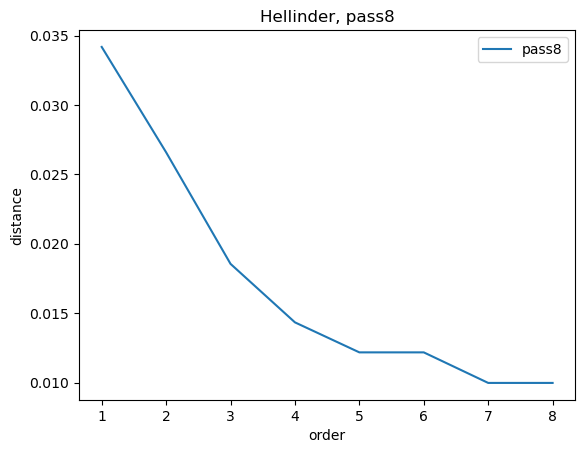

In [170]:
plt.plot(x, distance, label='pass8')
plt.title('Hellinder, pass8')
plt.xlabel('order')
plt.ylabel('distance')
plt.legend()
plt.show()

In [171]:
ps = np.array([get_p(disangles[i])[1] for i in range(1,9)])
qs = 1 - ps

qs8 = qs

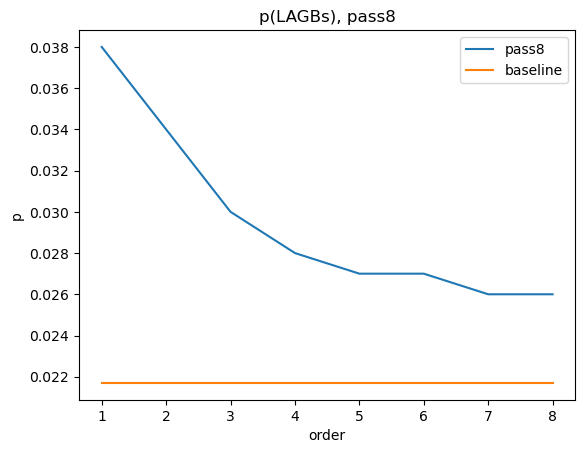

In [172]:
plt.plot(x, qs, label='pass8')
plt.plot(x, [Q[0]]*len(x), label='baseline')
plt.title('p(LAGBs), pass8')
plt.xlabel('order')
plt.ylabel('p')
plt.legend()
plt.show()

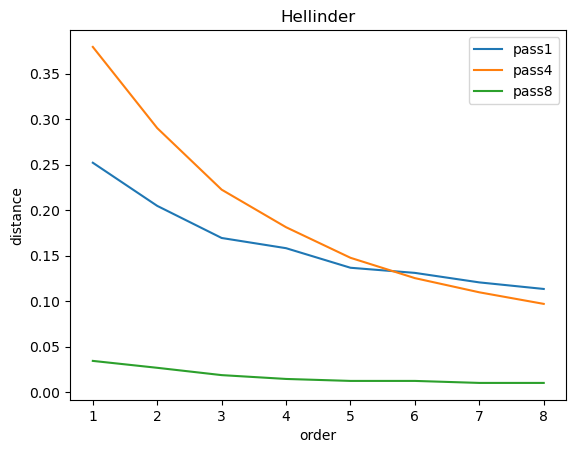

In [173]:
plt.plot(x, distance1, label='pass1')
plt.plot(x, distance4, label='pass4')
plt.plot(x, distance8, label='pass8')
plt.title('Hellinder')
plt.xlabel('order')
plt.ylabel('distance')
plt.legend()
plt.show()

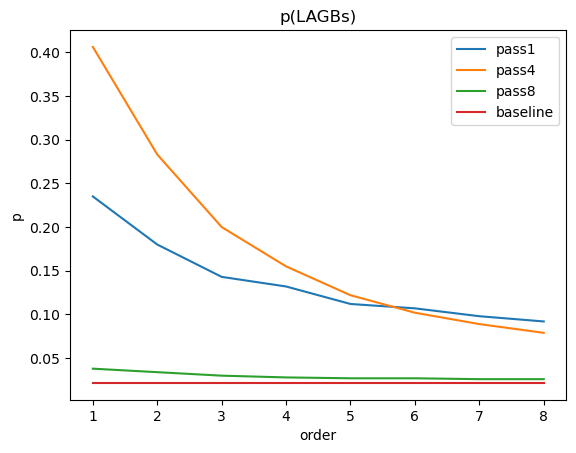

In [174]:
plt.plot(x, qs1, label='pass1')
plt.plot(x, qs4, label='pass4')
plt.plot(x, qs8, label='pass8')
plt.plot(x, [Q[0]]*len(x), label='baseline')
plt.title('p(LAGBs)')
plt.xlabel('order')
plt.ylabel('p')
plt.legend()
plt.show()

In [325]:
reload(matutils)

<module 'matgen.matutils' from '/Users/v94623eb2/Documents/Voronoi_DCC_Analyser/matgen/matutils.py'>

In [180]:
angles1 = np.loadtxt('angles2/disangles1_4584.txt')

In [181]:
angles2 = np.loadtxt('angles2/disangles2_9963.txt')

In [182]:
angles3 = np.loadtxt('angles2/disangles3_16023.txt')

In [183]:
angles4 = np.loadtxt('angles2/disangles4_22305.txt')

In [184]:
angles5 = np.loadtxt('angles2/disangles5_28625.txt')

In [177]:
angles6 = np.loadtxt('angles2/disangles6_34788.txt')

In [176]:
angles7 = np.loadtxt('angles2/disangles7_40448.txt')

In [237]:
angles8 = np.loadtxt('angles2/disangles8.txt')

In [238]:
angles9 = np.loadtxt('angles2/disangles9.txt')

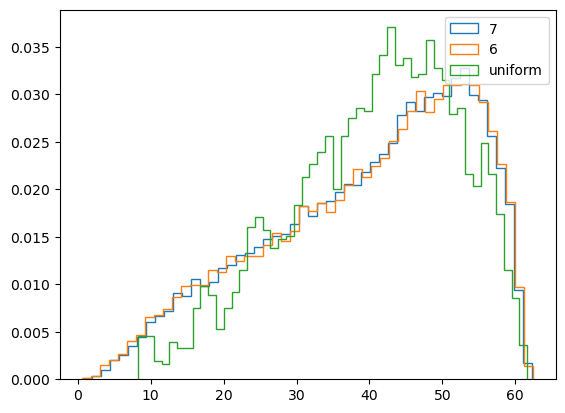

In [235]:
plt.hist(angles7, bins=50, density=True, histtype='step', label='7')
plt.hist(angles6, bins=50, density=True, histtype='step', label='6')
plt.hist(rand_dis[rand_dis!=-1], bins=50, density=True, histtype='step', label='uniform')
plt.legend()
plt.show()

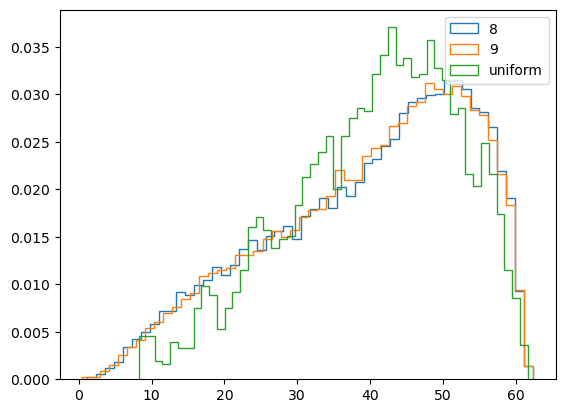

In [243]:
plt.hist(angles8, bins=50, density=True, histtype='step', label='8')
plt.hist(angles9, bins=50, density=True, histtype='step', label='9')
plt.hist(rand_dis[rand_dis!=-1], bins=50, density=True, histtype='step', label='uniform')
plt.legend()
plt.show()

In [204]:
(angles1 >= 15).sum(), (angles1 < 15).sum()

(3257, 1327)

In [259]:
matutils._check_chi2(ns, ms)

(4.838728962259044, 0.02782739813559465)

In [261]:
matutils.check_disangle_diff(a, b, 0.001)

False

In [262]:
import math

In [277]:
P = np.array([0, 1 - 0.289])

In [276]:
P > 0

array([False,  True])

In [279]:
np.all(P >= 0)

True

In [290]:
reload(matutils)

<module 'matgen.matutils' from '/Users/v94623eb2/Documents/Voronoi_DCC_Analyser/matgen/matutils.py'>

In [288]:
P = np.array([0.2894851657940663, 1 - 0.2894851657940663])
Q = np.array([0.07018340611353711, 1 - 0.07018340611353711])

In [292]:
matutils.hellinger(P, Q)

0.2113273212808567

In [269]:
p1 = 0.2894851657940663
p2 = 0.07018340611353711
q1 = 1 - p1
q2 = 1 - p2
math.sqrt((math.sqrt(p1) - math.sqrt(p2))**2 + (math.sqrt(q1) - math.sqrt(q2))**2)

0.29886196385536395

In [263]:
p1 = 0.2894851657940663
p2 = 0.15196226036334437
q1 = 1 - p1
q2 = 1 - p2
math.sqrt((math.sqrt(p1) - math.sqrt(p2))**2 + (math.sqrt(q1) - math.sqrt(q2))**2)

0.16747194584117403

In [264]:
p1 = 0.10434999687948573
p2 = 0.15196226036334437
q1 = 1 - p1
q2 = 1 - p2
math.sqrt((math.sqrt(p1) - math.sqrt(p2))**2 + (math.sqrt(q1) - math.sqrt(q2))**2)

0.07149251536558693

In [267]:
p1 = 0.06301023341382085
p2 = 0.059162381329113924
q1 = 1 - p1
q2 = 1 - p2
math.sqrt((math.sqrt(p1) - math.sqrt(p2))**2 + (math.sqrt(q1) - math.sqrt(q2))**2)

0.008034413765862902

In [268]:
p1 = 0.06301023341382085
p2 = 0.07018340611353711
q1 = 1 - p1
q2 = 1 - p2
math.sqrt((math.sqrt(p1) - math.sqrt(p2))**2 + (math.sqrt(q1) - math.sqrt(q2))**2)

0.014390208671695525

In [255]:
a = angles1
b = angles2

ns = np.array([(a >= 15).sum(), (a < 15).sum()])
ms = np.array([(b >= 15).sum(), (b < 15).sum()])
N = ns.sum()
M = ms.sum()
statistics = ((M * ns - N * ms) * (M * ns - N * ms) / (ns + ms)).sum() / N / M
p_value = 1 - stats.chi2.cdf(statistics, df=1)
if p_value < 0.05:
    print(statistics, p_value, True, (ns[1] / N, ms[1] / M))
else:
    print(statistics, p_value, False)

377.81439666180256 0.0 True (0.2894851657940663, 0.15196226036334437)


In [230]:
a = angles2
b = angles3

ns = np.array([(a >= 15).sum(), (a < 15).sum()])
ms = np.array([(b >= 15).sum(), (b < 15).sum()])
N = ns.sum()
M = ms.sum()
statistics = ((M * ns - N * ms) * (M * ns - N * ms) / (ns + ms)).sum() / N / M
p_value = 1 - stats.chi2.cdf(statistics, df=1)
if p_value < 0.05:
    print(statistics, p_value, True, (ns[1] / N, ms[1] / M))
else:
    print(statistics, p_value, False)

129.45845963479343 0.0 True (0.15196226036334437, 0.10434999687948573)


In [229]:
a = angles3
b = angles4

ns = np.array([(a >= 15).sum(), (a < 15).sum()])
ms = np.array([(b >= 15).sum(), (b < 15).sum()])
N = ns.sum()
M = ms.sum()
statistics = ((M * ns - N * ms) * (M * ns - N * ms) / (ns + ms)).sum() / N / M
p_value = 1 - stats.chi2.cdf(statistics, df=1)
if p_value < 0.05:
    print(statistics, p_value, True, (ns[1] / N, ms[1] / M))
else:
    print(statistics, p_value, False)

66.43248206814239 3.3306690738754696e-16 True (0.10434999687948573, 0.08016139878950908)


In [228]:
a = angles4
b = angles5

ns = np.array([(a >= 15).sum(), (a < 15).sum()])
ms = np.array([(b >= 15).sum(), (b < 15).sum()])
N = ns.sum()
M = ms.sum()
statistics = ((M * ns - N * ms) * (M * ns - N * ms) / (ns + ms)).sum() / N / M
p_value = 1 - stats.chi2.cdf(statistics, df=1)
if p_value < 0.05:
    print(statistics, p_value, True, (ns[1] / N, ms[1] / M))
else:
    print(statistics, p_value, False)

18.090146347252656 2.106889390651734e-05 True (0.08016139878950908, 0.07018340611353711)


In [253]:
a = angles5
b = angles6

ns = np.array([(a >= 15).sum(), (a < 15).sum()])
ms = np.array([(b >= 15).sum(), (b < 15).sum()])
N = ns.sum()
M = ms.sum()
statistics = ((M * ns - N * ms) * (M * ns - N * ms) / (ns + ms)).sum() / N / M
p_value = 1 - stats.chi2.cdf(statistics, df=1)
if p_value < 0.001:
    print(statistics, p_value, True, (ns[1] / N, ms[1] / M))
else:
    print(statistics, p_value, False)

13.062112452134414 0.00030132939151172877 True (0.07018340611353711, 0.06301023341382085)


In [266]:
a = angles6
b = angles7

ns = np.array([(a >= 15).sum(), (a < 15).sum()])
ms = np.array([(b >= 15).sum(), (b < 15).sum()])
N = ns.sum()
M = ms.sum()
statistics = ((M * ns - N * ms) * (M * ns - N * ms) / (ns + ms)).sum() / N / M
p_value = 1 - stats.chi2.cdf(statistics, df=1)
if p_value < 0.001:
    print(statistics, p_value, True, (ns[1] / N, ms[1] / M))
else:
    print(statistics, p_value, False, (ns[1] / N, ms[1] / M))

4.838728962259044 0.02782739813559465 False (0.06301023341382085, 0.059162381329113924)


In [241]:
a = angles7
b = angles8

ns = np.array([(a >= 15).sum(), (a < 15).sum()])
ms = np.array([(b >= 15).sum(), (b < 15).sum()])
N = ns.sum()
M = ms.sum()
statistics = ((M * ns - N * ms) * (M * ns - N * ms) / (ns + ms)).sum() / N / M
p_value = 1 - stats.chi2.cdf(statistics, df=1)
if p_value < 0.05:
    print(statistics, p_value, True, (ns[1] / N, ms[1] / M))
else:
    print(statistics, p_value, False, (ns[1] / N, ms[1] / M))

0.00013467715254304293 0.9907407187467613 False (0.059162381329113924, 0.05914367853929379)


In [244]:
a = angles8
b = angles9

ns = np.array([(a >= 15).sum(), (a < 15).sum()])
ms = np.array([(b >= 15).sum(), (b < 15).sum()])
N = ns.sum()
M = ms.sum()
statistics = ((M * ns - N * ms) * (M * ns - N * ms) / (ns + ms)).sum() / N / M
p_value = 1 - stats.chi2.cdf(statistics, df=1)
if p_value < 0.001:
    print(statistics, p_value, True, (ns[1] / N, ms[1] / M))
else:
    print(statistics, p_value, False, (ns[1] / N, ms[1] / M))

5.390074130123327 0.020251610454999125 False (0.05914367853929379, 0.05564785715715515)


In [250]:
a = angles7
b = rand_dis[rand_dis!=-1]

ns = np.array([(a >= 15).sum(), (a < 15).sum()])
ms = np.array([(b >= 15).sum(), (b < 15).sum()])
N = ns.sum()
M = ms.sum()
statistics = ((M * ns - N * ms) * (M * ns - N * ms) / (ns + ms)).sum() / N / M
p_value = 1 - stats.chi2.cdf(statistics, df=1)
if p_value < 0.001:
    print(statistics, p_value, True, (ns[1] / N, ms[1] / M))
else:
    print(statistics, p_value, False)

68.7510488281539 1.1102230246251565e-16 True (0.059162381329113924, 0.022043386983904827)


In [252]:
a = angles9
b = rand_dis[rand_dis!=-1]

ns = np.array([(a >= 15).sum(), (a < 15).sum()])
ms = np.array([(b >= 15).sum(), (b < 15).sum()])
N = ns.sum()
M = ms.sum()
statistics = ((M * ns - N * ms) * (M * ns - N * ms) / (ns + ms)).sum() / N / M
p_value = 1 - stats.chi2.cdf(statistics, df=1)
if p_value < 0.001:
    print(statistics, p_value, True, (ns[1] / N, ms[1] / M))
else:
    print(statistics, p_value, False)

59.93856937339665 9.769962616701378e-15 True (0.05564785715715515, 0.022043386983904827)


In [223]:
ns

array([32596,  2192])

In [224]:
ms

array([38055,  2393])

In [221]:
a = angles6
b = angles7

ns = np.array([(a >= 15).sum(), (a < 15).sum()])
ms = np.array([(b >= 15).sum(), (b < 15).sum()])
N = ns.sum()
M = ms.sum()
statistics = ((M * ns - N * ms) * (M * ns - N * ms) / (ns + ms)).sum() / N / M
p_value = 1 - stats.chi2.cdf(statistics, df=1)
if p_value < 0.05:
    print(statistics, p_value, True)
else:
    print(statistics, p_value, False)

4.838728962259044 0.02782739813559465 True


In [222]:
stats.chi2.ppf(0.95, df=1)

3.841458820694124

In [246]:
stats.chi2.ppf(0.99, df=1)

6.6348966010212145

In [247]:
stats.chi2.ppf(0.999, df=1)

10.827566170662733

In [248]:
stats.chi2.ppf(0.9999, df=1)

15.136705226623606

In [249]:
stats.chi2.ppf(0.99999, df=1)

19.511420964666268

In [210]:
ns

array([3257, 1327])

In [212]:
N

4584

In [211]:
ms

array([8449, 1514])

In [213]:
M

9963

409.33995862136555 0.0 True


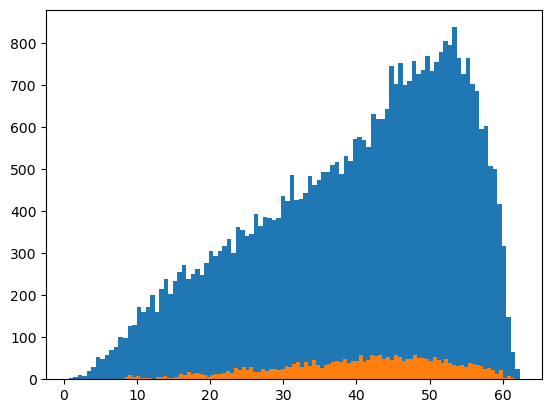

In [175]:
nbins = 100
a, _, _ = plt.hist(angles, bins=nbins)
b, _, _ = plt.hist(rand_dis[rand_dis!=-1], bins=nbins)
a = a.astype(int)
b = b.astype(int)
N = a.sum()
M = b.sum()
statistics = ((M * a - N * b) * (M * a - N * b) / (a + b)).sum() / N / M
p_value = 1 - stats.chi2.cdf(statistics, df=nbins-1)
if p_value < 0.05:
    print(statistics, p_value, True)
else:
    print(statistics, p_value, False)

104.90025004290736 0.3233215159400529 False


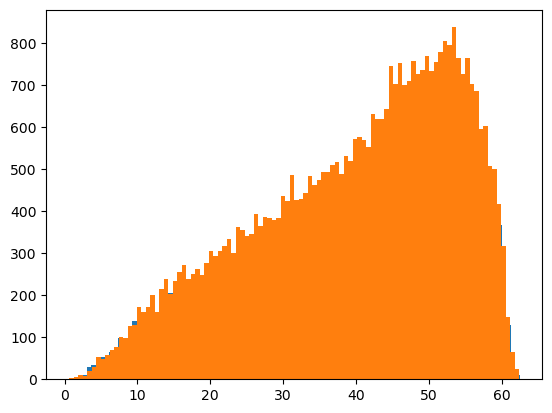

In [179]:
nbins = 100
a, _, _ = plt.hist(angles6, bins=nbins)
b, _, _ = plt.hist(angles7, bins=nbins)
a = a.astype(int)
b = b.astype(int)
N = a.sum()
M = b.sum()
statistics = ((M * a - N * b) * (M * a - N * b) / (a + b)).sum() / N / M
p_value = 1 - stats.chi2.cdf(statistics, df=nbins-1)
if p_value < 0.05:
    print(statistics, p_value, True)
else:
    print(statistics, p_value, False)

460.9300254296192 0.0 True


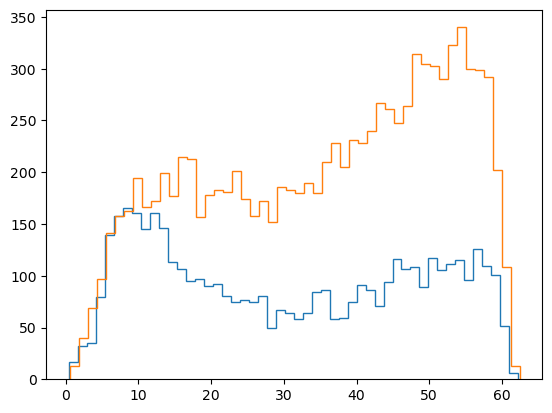

In [189]:
nbins = 50
a, _, _ = plt.hist(angles1, bins=nbins, histtype='step')
b, _, _ = plt.hist(angles2, bins=nbins, histtype='step')
a = a.astype(int)
b = b.astype(int)
N = a.sum()
M = b.sum()
statistics = ((M * a - N * b) * (M * a - N * b) / (a + b)).sum() / N / M
p_value = 1 - stats.chi2.cdf(statistics, df=nbins-1)
if p_value < 0.05:
    print(statistics, p_value, True)
else:
    print(statistics, p_value, False)

248.70252792585453 0.0 True


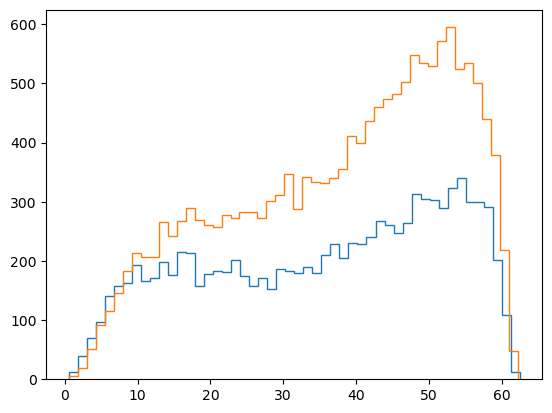

In [190]:
nbins = 50
a, _, _ = plt.hist(angles2, bins=nbins, histtype='step')
b, _, _ = plt.hist(angles3, bins=nbins, histtype='step')
a = a.astype(int)
b = b.astype(int)
N = a.sum()
M = b.sum()
statistics = ((M * a - N * b) * (M * a - N * b) / (a + b)).sum() / N / M
p_value = 1 - stats.chi2.cdf(statistics, df=nbins-1)
if p_value < 0.05:
    print(statistics, p_value, True)
else:
    print(statistics, p_value, False)

180.42612954870762 1.1102230246251565e-16 True


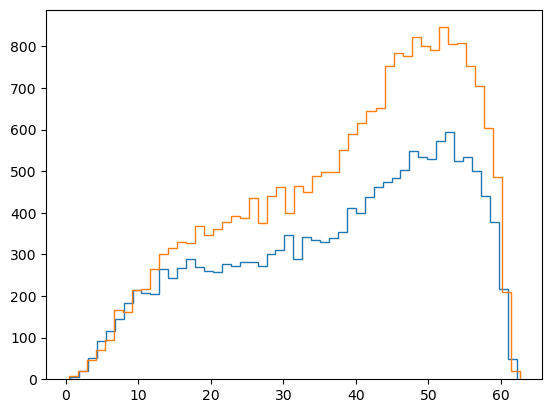

In [191]:
nbins = 50
a, _, _ = plt.hist(angles3, bins=nbins, histtype='step')
b, _, _ = plt.hist(angles4, bins=nbins, histtype='step')
a = a.astype(int)
b = b.astype(int)
N = a.sum()
M = b.sum()
statistics = ((M * a - N * b) * (M * a - N * b) / (a + b)).sum() / N / M
p_value = 1 - stats.chi2.cdf(statistics, df=nbins-1)
if p_value < 0.05:
    print(statistics, p_value, True)
else:
    print(statistics, p_value, False)

80.28496029459573 0.003193564496764001 True


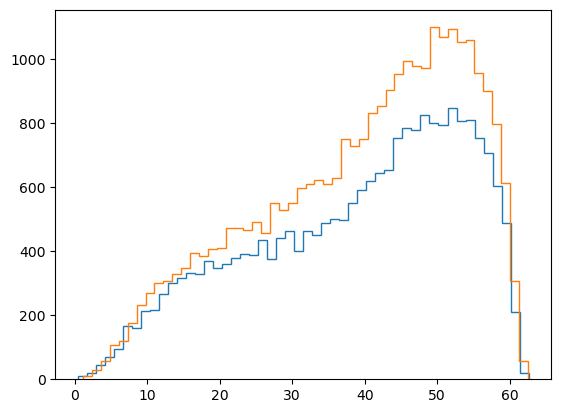

In [192]:
nbins = 50
a, _, _ = plt.hist(angles4, bins=nbins, histtype='step')
b, _, _ = plt.hist(angles5, bins=nbins, histtype='step')
a = a.astype(int)
b = b.astype(int)
N = a.sum()
M = b.sum()
statistics = ((M * a - N * b) * (M * a - N * b) / (a + b)).sum() / N / M
p_value = 1 - stats.chi2.cdf(statistics, df=nbins-1)
if p_value < 0.05:
    print(statistics, p_value, True)
else:
    print(statistics, p_value, False)

227.6892456507803 0.07967186448251573 False


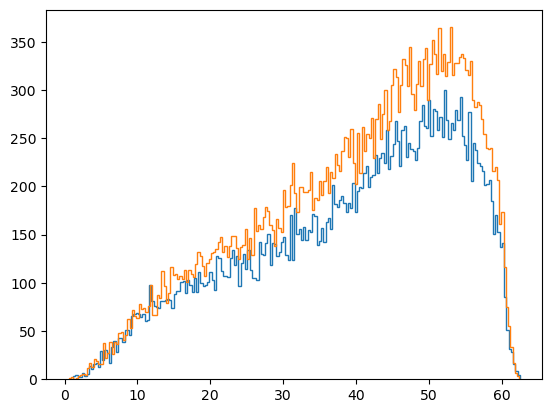

In [198]:
nbins = 200
a, _, _ = plt.hist(angles5, bins=nbins, histtype='step')
b, _, _ = plt.hist(angles6, bins=nbins, histtype='step')
a = a.astype(int)
b = b.astype(int)
N = a.sum()
M = b.sum()
statistics = ((M * a - N * b) * (M * a - N * b) / (a + b)).sum() / N / M
p_value = 1 - stats.chi2.cdf(statistics, df=nbins-1)
if p_value < 0.05:
    print(statistics, p_value, True)
else:
    print(statistics, p_value, False)

132.34933112478538 0.014167291688929606 True


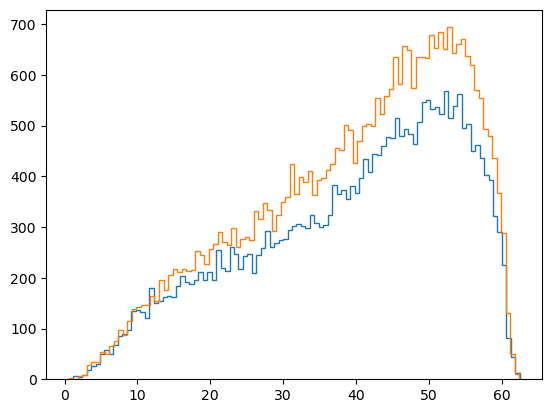

In [199]:
nbins = 100
a, _, _ = plt.hist(angles5, bins=nbins, histtype='step')
b, _, _ = plt.hist(angles6, bins=nbins, histtype='step')
a = a.astype(int)
b = b.astype(int)
N = a.sum()
M = b.sum()
statistics = ((M * a - N * b) * (M * a - N * b) / (a + b)).sum() / N / M
p_value = 1 - stats.chi2.cdf(statistics, df=nbins-1)
if p_value < 0.05:
    print(statistics, p_value, True)
else:
    print(statistics, p_value, False)

45.856582275591904 0.601339263155236 False


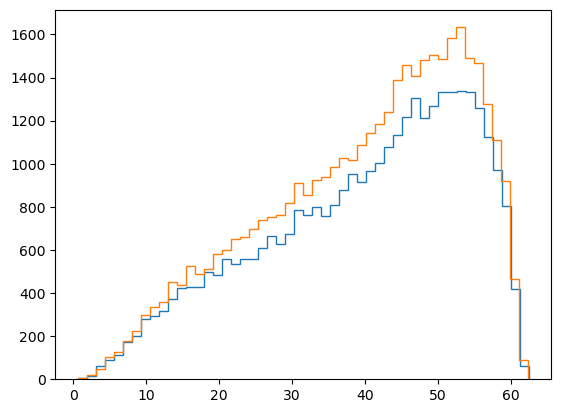

In [194]:
nbins = 50
a, _, _ = plt.hist(angles6, bins=nbins, histtype='step')
b, _, _ = plt.hist(angles7, bins=nbins, histtype='step')
a = a.astype(int)
b = b.astype(int)
N = a.sum()
M = b.sum()
statistics = ((M * a - N * b) * (M * a - N * b) / (a + b)).sum() / N / M
p_value = 1 - stats.chi2.cdf(statistics, df=nbins-1)
if p_value < 0.05:
    print(statistics, p_value, True)
else:
    print(statistics, p_value, False)

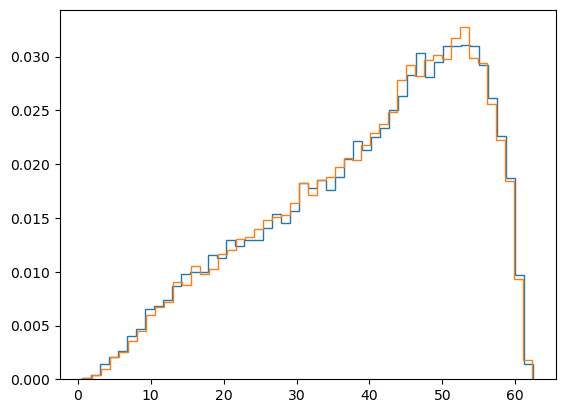

In [234]:
nbins = 50
_ = plt.hist(angles6, bins=nbins, histtype='step', density=True)
_ = plt.hist(angles7, bins=nbins, histtype='step', density=True)
_ = plt.hist(angles7, bins=nbins, histtype='step', density=True)
plt.show()

In [115]:
from scipy.stats import chisquare, chi2

In [119]:
a.dtype = np.int64

In [125]:
a = a.astype(int)
b = b.astype(int)

In [128]:
N = a.sum()
M = b.sum()

In [127]:
b.sum()

2858

In [159]:
a

array([ 17,  32,  35,  79, 139, 158, 165, 161, 145, 161, 146, 113, 107,
        95,  97,  90,  92,  80,  75,  77,  75,  80,  50,  67,  64,  58,
        64,  84,  86,  58,  59,  75,  91,  86,  71,  94, 116, 107, 108,
        89, 117, 106, 111, 115,  96, 126, 109, 101,  51,   6])

In [162]:
N

4584

In [160]:
b

array([ 14,  14,   6,   5,  12,  10,  10,  23,  30,  27,  16,  23,  28,
        35,  49,  52,  48,  42,  45,  46,  56,  65,  69,  73,  78,  61,
        78,  84,  87,  86,  98, 104, 113, 101, 103,  97,  98, 109, 100,
        96,  85,  87,  66,  62,  76,  66,  53,  35,  26,  11])

In [161]:
M

2858

In [163]:
asum = 0
for ni, mi in zip(a, b):
    asum += (M*ni - N*mi) * (M*ni - N*mi) / (ni + mi)
asum = asum / (N*M)
print(asum)

850.4540435179409


In [131]:
((M * a - N * b) * (M * a - N * b) / (a + b)).sum() / N / M

850.4540435179412

In [ ]:
chi2stat = 

In [139]:
chi2.pdf(850, df=49)

6.174713181648361e-147

In [140]:
from scipy import stats

In [151]:
stats.chi2.ppf(0.975, df=49)

70.22241356643451

In [166]:
1 - stats.chi2.cdf(850, df=49)

0.0

In [164]:
1 - stats.chi2.cdf(25, df=15)

0.04994343362642828

In [165]:
stats.chi2.ppf(0.95, df=15)

24.995790139728616

In [146]:
stats.norm.ppf(0.975)

1.959963984540054

In [157]:
(1 - stats.norm.cdf(1.959963984540054))*2

0.050000000000000044

In [104]:
len(b)

51

In [97]:
len(angles)

4584

In [98]:
len(rand_dis)

2977

### HPT2022/HPT/Neper_Cu_03Cr_05Zr/hpt3/hpt3.tess

In [88]:
filename = '/Users/v94623eb2/Documents/Voronoi_DCC_Analyser/Experimental_Data/HPT2022/HPT/Neper_Cu_03Cr_05Zr/hpt3/hpt3.tess'
c = base.CellComplex.from_tess_file(filename, with_measures=False, with_theta=False, theta_file=None, lower_thrd=None, upper_thrd=None)
print(c)

Complex loaded: 3.0 s
<class CellComplex> 2D
69072 vertices
103606 edges
34535 faces


In [89]:
c.find_neighbors_of_order(2)

In [90]:
st = time.time()
try:
    angles = c.get_neighbor_dis_angles(2)
    print(time.time() - st)
except:
    print(time.time() - st)

100%|█████████████████████████████████████| 34535/34535 [09:45<00:00, 59.03it/s]

585.6945171356201


In [92]:
len(angles)

225697

In [8]:
st = time.time()
try:
    angles = c.get_neighbor_dis_angles(2)
    print(time.time() - st)
except:
    print(time.time() - st)

ERROR:root:This is an exception!
Traceback (most recent call last):
  File "/Users/v94623eb2/Documents/Voronoi_DCC_Analyser/matgen/matutils.py", line 300, in calculate_disorient
    theta = math.acos((g[0, 0] + g[1, 1] + g[2, 2] - 1) / 2)
ValueError: math domain error


R1: [[ 0.9947473   0.04129528 -0.09366168]
 [-0.0836165   0.85560891 -0.5108245 ]
 [ 0.05904313  0.51597296  0.85456762]]
R2: [[ 0.99473269  0.04144461 -0.09375084]
 [-0.08379012  0.85560169 -0.51080815]
 [ 0.05904313  0.51597296  0.85456762]]
_g: [[ 9.99999985e-01 -1.74532924e-04  0.00000000e+00]
 [ 1.74532924e-04  9.99999985e-01 -5.55111512e-17]
 [ 1.38777878e-17  5.55111512e-17  1.00000000e+00]]
_g: [[ 9.99999985e-01  1.74532924e-04  0.00000000e+00]
 [ 1.74532924e-04 -9.99999985e-01  5.55111512e-17]
 [ 1.38777878e-17 -5.55111512e-17 -1.00000000e+00]]
grain1: Face2D(id=4543)
grain2.id: 4635
72.12662887573242


In [9]:
g = np.array(
    [[ 9.99999985e-01,  1.74532924e-04,  0.00000000e+00],
     [ 1.74532924e-04, -9.99999985e-01,  5.55111512e-17],
     [ 1.38777878e-17, -5.55111512e-17, -1.00000000e+00]])

In [10]:
g

array([[ 9.99999985e-01,  1.74532924e-04,  0.00000000e+00],
       [ 1.74532924e-04, -9.99999985e-01,  5.55111512e-17],
       [ 1.38777878e-17, -5.55111512e-17, -1.00000000e+00]])

In [11]:
(g[0, 0] + g[1, 1] + g[2, 2] - 1) / 2

-1.0

In [12]:
import math

In [13]:
math.acos(b)

3.141592653589793

In [15]:
grain1 = c._faces[4543]

In [16]:
grain2 = c._faces[4635]
print(grain2)

Face2D(id=4635)


In [19]:
grain1.ori

(83.472, 31.288, 280.39)

In [20]:
grain2.ori

(83.472, 31.288, 280.4)

In [41]:
R1 = matutils.ori_mat(grain1.ori, grain1.oridesc)
print(R1)

[[ 0.9947473   0.04129528 -0.09366168]
 [-0.0836165   0.85560891 -0.5108245 ]
 [ 0.05904313  0.51597296  0.85456762]]


In [42]:
R2 = matutils.ori_mat(grain2.ori, grain2.oridesc)
print(R2)

[[ 0.99473269  0.04144461 -0.09375084]
 [-0.08379012  0.85560169 -0.51080815]
 [ 0.05904313  0.51597296  0.85456762]]


In [54]:
from scipy import linalg

In [58]:
_g2 = R1 @ linalg.inv(R2)
_g2

array([[ 9.99999985e-01, -1.74532924e-04,  0.00000000e+00],
       [ 1.74532924e-04,  9.99999985e-01, -5.55111512e-17],
       [ 1.38777878e-17,  5.55111512e-17,  1.00000000e+00]])

In [74]:
_g = R1 @ np.linalg.inv(R2)
_g

array([[ 9.99999985e-01, -1.74532924e-04,  0.00000000e+00],
       [ 1.74532924e-04,  9.99999985e-01,  5.55111512e-17],
       [ 1.38777878e-17,  1.11022302e-16,  1.00000000e+00]])

In [51]:
(_g[0, 0] - _g[1, 1] - _g[2, 2] - 1) / 2

-1.0

In [44]:
math.acos((_g[0, 0] - _g[1, 1] - _g[2, 2] - 1) / 2)

3.141592653589793

In [65]:
_g.dtype

dtype('float64')

In [64]:
_g2.dtype

dtype('float64')

In [61]:
(_g[0, 0] - _g[1, 1] - _g[2, 2] - 1) / 2

-1.0

In [60]:
(_g2[0, 0] - _g2[1, 1] - _g2[2, 2] - 1) / 2

-1.0000000000000002

In [71]:
(_g3[0, 0] - _g3[1, 1] - _g3[2, 2] - 1) / 2

-1.0000000000000002

In [66]:
_g == _g2

array([[False, False,  True],
       [False,  True, False],
       [ True, False,  True]])

In [69]:
_g3 = _g 

In [70]:
_g3[0,0] = 0.9999999847691289

In [79]:
_g[0,0], _g[1,1]

(0.999999984769129, 0.9999999847691292)

In [80]:
_g2[0,0], _g2[1,1]

(0.9999999847691289, 0.9999999847691292)

In [75]:
_g[0,0] - _g[1,1]

-2.220446049250313e-16

In [73]:
_g2[0,0] - _g2[1,1]

-3.3306690738754696e-16

In [91]:
(_g2[0, 0] - _g2[1, 1] - _g2[2, 2] - 1) / 2

-1.0000000000000002

In [84]:
math.acos(1)

0.0

In [85]:
math.acos(-1)

3.141592653589793

In [57]:
matutils.calculate_disorient(R1, R2)

0.009999999946206801

## ECAP2022/Cu_01Cr_01Zr/Neper_Cu_01Cr_01Zr/pass1/pass1.tess

In [34]:
filename = 'Experimental_Data/ECAP2022/Cu_01Cr_01Zr/Neper_Cu_01Cr_01Zr/pass1/pass1.tess'
# theta_file = 'tests/test_data/pass_1_misorientation.txt'
c1 = base.CellComplex.from_tess_file(filename, with_measures=False, with_theta=False, theta_file=None, lower_thrd=None, upper_thrd=None)
print(c1)

Complex loaded: 0.4 s
<class CellComplex> 2D
1986 vertices
2977 edges
992 faces


In [36]:
c1.set_theta_from_ori()

In [46]:
c1.faces[0].oridesc

'euler-roe:active'

In [40]:
for e in c1.edges[:10]:
    print(e.id, e.theta)

1 14.916357025192234
2 42.154002964134975
3 43.363656492114316
4 36.08474233253777
5 44.213448892380185
6 22.4808068242876
7 44.8641419689645
8 34.45249088010136
9 -1
10 -1


In [42]:
import numpy as np

In [43]:
filename = 'Experimental_Data/ECAP2022/Cu_01Cr_01Zr/Neper_Cu_01Cr_01Zr/pass1/pass1_ori.txt'
ori_euler = np.loadtxt(filename)

In [44]:
for f, row in zip(c1.faces, ori_euler):
    f.set_crystal_ori(crysym='cubic', oridesc='euler-roe:active', ori_components=tuple(row))

In [45]:
for e in c1.edges[:10]:
    print(e.id, e.theta)

1 14.916357025192234
2 42.154002964134975
3 43.363656492114316
4 36.08474233253777
5 44.213448892380185
6 22.4808068242876
7 44.8641419689645
8 34.45249088010136
9 -1
10 -1


In [ ]:
c1.

In [51]:
c1.find_neighbors_of_order(7)

In [52]:
c1.n_max_order

7

In [53]:
c = c1
angles = []
st = time.time()
for i in range(1, c.n_max_order + 1):
    angles.append(c.get_neighbor_dis_angles(i))
    print(i, len(angles[i - 1]), round(time.time() - st, 2), 's')

1 2858 6.91 s
2 6598 22.84 s
3 11163 49.94 s
4 15992 88.7 s
5 20647 138.38 s
6 24713 198.02 s
7 27827 265.3 s


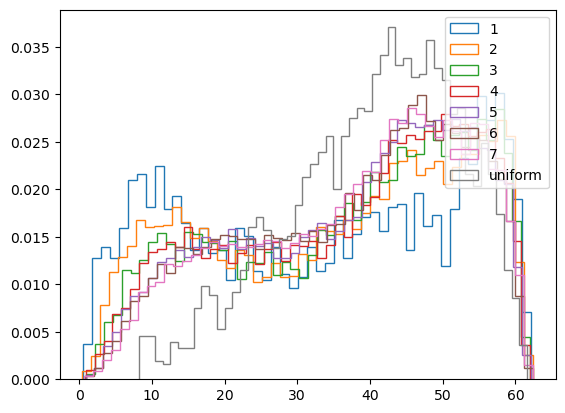

In [54]:
for i in range(len(angles)):
    plt.hist(angles[i], bins=50, density=True, histtype='step', label=str(i+1))
plt.hist(rand_dis[rand_dis!=-1], bins=50, density=True, histtype='step', label='uniform')
plt.legend()
plt.show()

## ECAP2022/Cu_01Cr_01Zr/Neper_Cu_01Cr_01Zr/pass4

In [72]:
filename = 'Experimental_Data/ECAP2022/Cu_01Cr_01Zr/Neper_Cu_01Cr_01Zr/pass4/pass4.tess'
# theta_file = 'tests/test_data/pass_1_misorientation.txt'
c4 = base.CellComplex.from_tess_file(filename, with_measures=False, with_theta=False, theta_file=None, lower_thrd=None, upper_thrd=None)
print(c4)

Complex loaded: 0.8 s
<class CellComplex> 2D
20568 vertices
30850 edges
10283 faces


In [73]:
filename = 'Experimental_Data/ECAP2022/Cu_01Cr_01Zr/Neper_Cu_01Cr_01Zr/pass4/pass4_ori.txt'
ori_euler = np.loadtxt(filename)

In [74]:
for f, row in zip(c4.faces, ori_euler):
    f.set_crystal_ori(crysym='cubic', oridesc='euler-roe:active', ori_components=tuple(row))

In [76]:
c4.find_neighbors_of_order(7)

In [ ]:
c = c4
angles = []
st = time.time()
for i in range(1, c.n_max_order + 1):
    angles.append(c.get_neighbor_dis_angles(i))
    print(i, len(angles[i - 1]), round(time.time() - st, 2), 's')

1 30537 74.65 s
2 69582 243.23 s
3 119255 534.08 s
4 177434 965.48 s
5 242649 1557.63 s


In [ ]:
for e in c4.edges[:10]:
    print(e.id, e.theta)

In [ ]:
for i in range(len(angles)):
    plt.hist(angles[i], bins=50, density=True, histtype='step', label=str(i+1))
plt.hist(rand_dis[rand_dis!=-1], bins=50, density=True, histtype='step', label='uniform')
plt.legend()
plt.show()

## ECAP2022/Cu_01Cr_01Zr/Neper_Cu_01Cr_01Zr/pass8

In [ ]:
filename = 'Experimental_Data/ECAP2022/Cu_01Cr_01Zr/Neper_Cu_01Cr_01Zr/pass8/pass8.tess'
# theta_file = 'tests/test_data/pass_1_misorientation.txt'
c8 = base.CellComplex.from_tess_file(filename, with_measures=False, with_theta=False, theta_file=None, lower_thrd=None, upper_thrd=None)
print(c8)

In [ ]:
filename = 'Experimental_Data/ECAP2022/Cu_01Cr_01Zr/Neper_Cu_01Cr_01Zr/pass8/pass8_ori.txt'
ori_euler = np.loadtxt(filename)

In [ ]:
for f, row in zip(c8.faces, ori_euler):
    f.set_crystal_ori(crysym='cubic', oridesc='euler-roe:active', ori_components=tuple(row))

In [ ]:
c8.find_neighbors_of_order(7)

In [ ]:
c = c8
angles = []
st = time.time()
for i in range(1, c.n_max_order + 1):
    angles.append(c.get_neighbor_dis_angles(i))
    print(i, len(angles[i - 1]), round(time.time() - st, 2), 's')

In [ ]:
for e in c8.edges[:10]:
    print(e.id, e.theta)

In [ ]:
for i in range(len(angles)):
    plt.hist(angles[i], bins=50, density=True, histtype='step', label=str(i+1))
plt.hist(rand_dis[rand_dis!=-1], bins=50, density=True, histtype='step', label='uniform')
plt.legend()
plt.show()

Rodrigues

In [ ]:
matutils._R_from_Rodrigues()

In [27]:
c1._faces[1].oridesc

'rodrigues:active'

In [29]:
import numpy as np

In [95]:
filename = 'Experimental_Data/ECAP2022/Cu_01Cr_01Zr/Neper_RandomOri_Cu-0.1Cr-0.1Zr/pass1/disorientation_pass1_random.stedge'
rand_dis = np.loadtxt(filename)

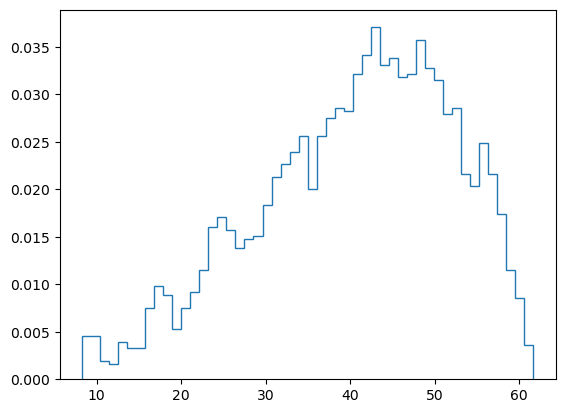

In [33]:
plt.hist(rand_dis[rand_dis!=-1], bins=50, density=True, histtype='step')
plt.show()

In [31]:
rand_dis[:10]

array([43.54296548, 49.99181942, 41.75535271, 47.63387008, 33.37465009,
       35.63126552, 46.04333228, 46.69634398, -1.        , -1.        ])

In [7]:
filename = 'Experimental_Data/ECAP2022/Cu_01Cr_01Zr/Neper_RandomOri_Cu-0.1Cr-0.1Zr/pass1/pass1_1_rand.tess'
# theta_file = 'tests/test_data/pass_1_misorientation.txt'
c1_rand = base.CellComplex.from_tess_file(filename, with_measures=False, with_theta=False, theta_file=None, lower_thrd=None, upper_thrd=None)
print(c1_rand)

Complex loaded: 0.1 s
<class CellComplex> 2D
1986 vertices
2977 edges
992 faces


In [10]:
c1_rand.faces[0].oridesc

'rodrigues:active'

In [227]:
c.find_neighbors_of_order(7)

In [228]:
c.n_max_order

7

In [230]:
angles = []
st = time.time()
for i in range(1, c.n_max_order + 1):
    angles.append(c.get_neighbor_dis_angles(i))
    print(i, len(angles[i - 1]), round(time.time() - st, 2), 's')

1 4584 10.82 s
2 9963 34.19 s
3 16023 72.09 s
4 22305 124.61 s
5 28625 192.12 s
6 34788 274.08 s
7 40448 368.69 s


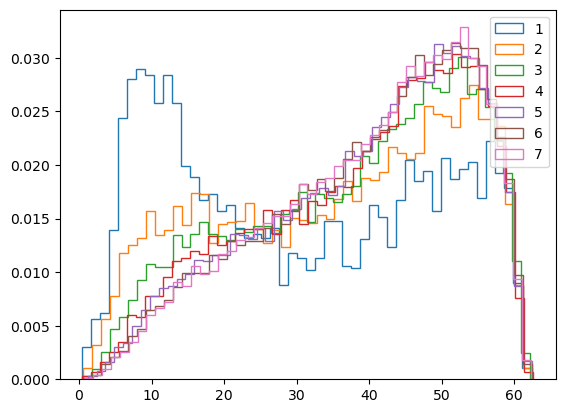

In [232]:
for i in range(len(angles)):
    plt.hist(angles[i], bins=50, density=True, histtype='step', label=str(i+1))
plt.legend()
plt.show()